<a href="https://colab.research.google.com/github/MrAgui/LE1_Aguilar_KJ/blob/main/LabExam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Source

`Tfekci,Pnar and Kaya,Heysem. (2014). Combined Cycle Power Plant. UCI Machine Learning Repository. https://doi.org/10.24432/C5002N.`

Data: The "Combined Cycle Power Plant" dataset contains the following features (variables):

* Temperature (T): The temperature measured in °C.
* Ambient Pressure (AP): The ambient pressure is measured in millibars
* Relative Humidity (RH): The relative humidity measured in percent.
* Exhaust Vacuum (V): The exhaust vacuum measured in cm Hg.
* Electrical Energy Output (PE): The electrical energy output of the power plant measured in MW.



# Import Libraries and Connect Gdrive  


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [49]:
# Create Data Frame
df = pd.read_csv('/content/drive/MyDrive/datasets/Folds5x2_pp.csv')


In [50]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [51]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Data Cleaning

In [55]:
duplicates = df.duplicated().sum()
print("Total duplicates:", duplicates)
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

Total duplicates: 41
Missing data:
 AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [56]:
df = df.drop_duplicates() # Drop duplicates to clean the data

# Define X and Y

In [57]:
X = df.drop(columns=['PE'])
y = df['PE']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define Pipeline

In [63]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

# Model Evaluation

In [64]:
y_pred = pipeline.predict(X_test)

In [65]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

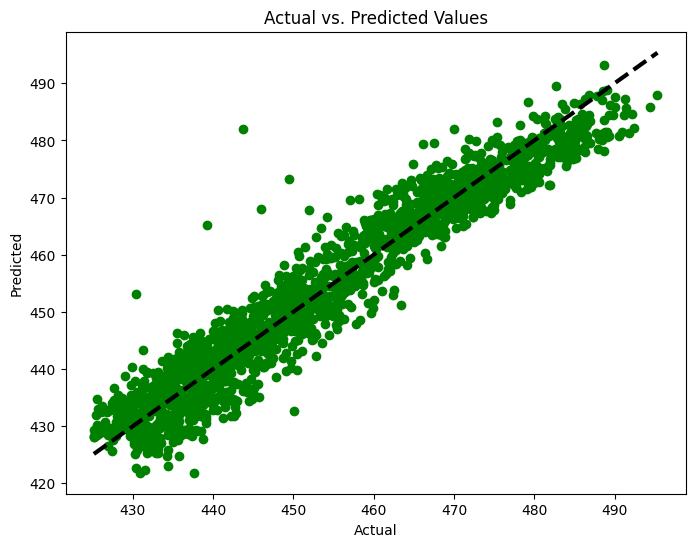

In [67]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()

# Summary of model results

In [68]:
print("Linear Regression Model Results:")
print("-------------------------------")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Linear Regression Model Results:
-------------------------------
Mean Squared Error (MSE): 21.04514714523833
Root Mean Squared Error (RMSE): 4.587499007655297
R-squared (R2) Score: 0.9283920303369918
